In [76]:
# Dependencies
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import csv
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
final_csv = pd.read_csv('final_csv.csv') 
final_csv.head()

C:\Users\PDonw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
0,19790,249.0,0.0,NaN,0.0,2120.0,NaN,0.0,DL,NaN,...,1,NaN,DTW,11433,Detroit,MI,NaN,DL,NaN,2016
1,19790,92.0,0.0,NaN,0.0,2319.0,NaN,0.0,DL,NaN,...,1,NaN,ATL,10397,Atlanta,GA,NaN,DL,NaN,2016
2,19790,207.0,0.0,NaN,0.0,547.0,NaN,0.0,DL,NaN,...,1,NaN,LAX,12892,Los Angeles,CA,NaN,DL,NaN,2016
3,19790,173.0,0.0,NaN,0.0,2213.0,NaN,0.0,DL,NaN,...,1,NaN,SLC,14869,Salt Lake City,UT,NaN,DL,NaN,2016
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016


In [3]:
totflights_bydate = final_csv.groupby("FL_DATE",as_index=False)
totflights_bydate= totflights_bydate["FLIGHTS"].count()
totflights_bydate.head()

,FL_DATE,FLIGHTS
0,2016-01-01,13019
1,2016-01-02,14869
2,2016-01-03,15878
3,2016-01-04,15570
4,2016-01-05,14582


In [4]:
final_delayed = final_csv.loc[final_csv["DEP_DEL15"] == 1 ,:]
final_delayed.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016


In [5]:
final_delayed_bymonth = final_csv.groupby("MONTH",as_index=False)
final_delayed_bymonth   = final_delayed_bymonth["FLIGHTS"].count()
final_delayed_bymonth

,MONTH,FLIGHTS
0,1,445827
1,2,423889
2,3,479122
3,4,461630
4,5,958716
5,7,502457
6,8,498347
7,9,454878
8,10,472626
9,11,450938


In [6]:
final_csv.columns

Index(['AIRLINE_ID', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_TIME', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME',
       'DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DISTANCE', 'DIVERTED', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_ARR_DELAY', 'DIV_REACHED_DEST', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'NAS_DELAY',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'SECURITY_DELAY', 'UNIQUE_CARRIER', 'WEATHER_DELAY', 'YEAR'],
      dtype='object')

In [107]:
final_diverted = final_csv.loc[final_csv["DIVERTED"] == 1 ,:]
final_diverted.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
240,19790,NaN,NaN,NaN,NaN,7.0,NaN,0.0,DL,NaN,...,1,NaN,SEA,14747,Seattle,WA,NaN,DL,NaN,2016
1505,19790,NaN,NaN,NaN,NaN,1937.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
2118,19790,NaN,NaN,NaN,NaN,756.0,NaN,0.0,DL,NaN,...,1,NaN,PHX,14107,Phoenix,AZ,NaN,DL,NaN,2016
3046,19790,NaN,NaN,NaN,NaN,2254.0,NaN,0.0,DL,NaN,...,1,NaN,BDL,10529,Hartford,CT,NaN,DL,NaN,2016
5389,19790,NaN,NaN,NaN,NaN,1258.0,NaN,0.0,DL,NaN,...,1,NaN,PDX,14057,Portland,OR,NaN,DL,NaN,2016


In [108]:
# By Date
flights_diverted_bydate = final_diverted.groupby("FL_DATE",as_index=False)
flights_diverted_bydate= flights_diverted_bydate["DIVERTED"].count()
flights_diverted_bydate.head()

,FL_DATE,DIVERTED
0,2016-01-01,8
1,2016-01-02,21
2,2016-01-03,24
3,2016-01-04,13
4,2016-01-05,41


In [109]:
# Day of Week
flights_diverted_byday = final_diverted.groupby("DAY_OF_WEEK",as_index=False)
flights_diverted_byday= flights_diverted_byday["DIVERTED"].count()
flights_diverted_byday.head()

,DAY_OF_WEEK,DIVERTED
0,1,1863
1,2,2036
2,3,2056
3,4,1960
4,5,2008


In [110]:
# By Month
flights_diverted_bymonth = final_diverted.groupby("MONTH",as_index=False)
flights_diverted_bymonth= flights_diverted_bymonth["DIVERTED"].count()
flights_diverted_bymonth.head()

,MONTH,DIVERTED
0,1,864
1,2,969
2,3,1103
3,4,819
4,5,2700


In [111]:
# DAY_OF_MONTH
flights_diverted_dayofmonth = final_diverted.groupby("DAY_OF_MONTH",as_index=False)
flights_diverted_dayofmonth= flights_diverted_dayofmonth["DIVERTED"].count()
flights_diverted_dayofmonth.head()

,DAY_OF_MONTH,DIVERTED
0,1,408
1,2,502
2,3,255
3,4,401
4,5,336


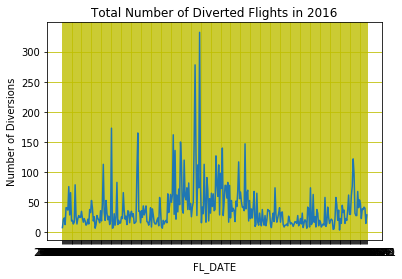

In [112]:
# By Date
plt.plot(flights_diverted_bydate["FL_DATE"],flights_diverted_bydate["DIVERTED"])
plt.xlabel("FL_DATE")
plt.ylabel("Number of Diversions")
plt.title("Total Number of Diverted Flights in 2016")
plt.grid(b=True, which='major', color='y', linestyle='-')
plt.show()

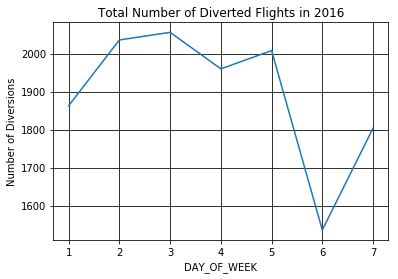

In [113]:
# Day of Week
plt.plot(flights_diverted_byday["DAY_OF_WEEK"],flights_diverted_byday["DIVERTED"])
plt.xlabel("DAY_OF_WEEK")
plt.ylabel("Number of Diversions")
plt.title("Total Number of Diverted Flights in 2016")
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.show()

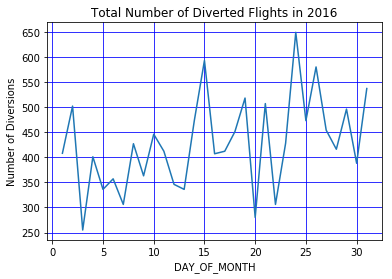

In [116]:
#Time(dayofmonth) vs diversioncount (Line) 
plt.plot(flights_diverted_dayofmonth["DAY_OF_MONTH"],flights_diverted_dayofmonth["DIVERTED"])
plt.xlabel("DAY_OF_MONTH")
plt.ylabel("Number of Diversions")
plt.title("Total Number of Diverted Flights in 2016")
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()


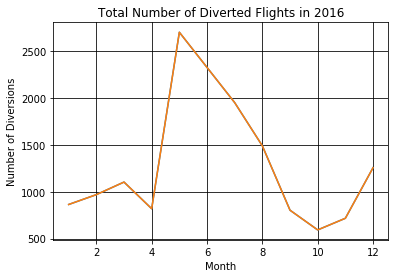

In [118]:
 #Time(month) vs diversioncount (Line) 
plt.plot(flights_diverted_bymonth["MONTH"],flights_diverted_bymonth["DIVERTED"])
plt.xlabel("Month")
plt.ylabel("Number of Diversions")
plt.title("Total Number of Diverted Flights in 2016")
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.show()


In [135]:
final_csv.columns

Index(['AIRLINE_ID', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_TIME', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME',
       'DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DISTANCE', 'DIVERTED', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_ARR_DELAY', 'DIV_REACHED_DEST', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'NAS_DELAY',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'SECURITY_DELAY', 'UNIQUE_CARRIER', 'WEATHER_DELAY', 'YEAR'],
      dtype='object')